# Απαντήσεις εργασίας χειμερινού εξαμήνου 2018

### Για το μάθημα «ΜΟΠ 511 Εφαρμοσμένη Γεωστατιστική»

* Η εκφώνηση της Εργασίας υπάρχει στο e-class του Μαθήματος. 

* Εκ παραδρομής η εκφώνηση της Εργασίας αναφέρει "ποσοστό Θορίου" ενώ πρόκειται για __ppm__ Θορίου. [D'oh!](https://youtu.be/V2bROprwinQ)

* Όπως μόλις διαπιστώσατε, [ο νόμος του Croucher](https://twitter.com/lawrennd/status/646978856524587008) ισχύει πάντα, επομένως δεν σας εγγυώμαι ότι οι Απαντήσεις είναι 100% σωστές.

* Οι Απαντήσεις ακολουθούν την άδεια του [repository](https://github.com/ManolisPetrakis/Applied-Geostats-with-MATLAB).

* Τα [δεδομένα](https://gdr.openei.org/submissions/284) που χρησιμοποιούμε στην Εργασία παρέχονται από το Utah State University με άδεια [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/).

_Μανώλης Πετράκης, Ιανουάριος 2019_

-----------------

## Μέρος Α'

### 1.  
Από την [ιστοσελίδα](https://openei.org/doe-opendata/dataset/mountain-home-well-borehole-geophysics-database) που αναφέρει η εκφώνηση της Εργασίας κατεβάζουμε και αποθηκεύουμε το αρχείο `Mountain_Home_Th.csv` στον φάκελο που εργαζόμαστε στη MATLAB&reg;. Ας διαβάσουμε το αρχείο ως table για να δούμε τι περιέχει:

In [1]:
tbl = readtable('Mountain_Home_Th.csv');
size(tbl)
tbl(1:10, :)


ans =

       10533           2


ans =

  10×2 table

     Depth         Th    
    ________    _________

    'm'         'ppm'    
    '619.02'    '-999.25'
    '619.12'    '8.96313'
    '619.22'    '9.11561'
    '619.32'    '9.31086'
    '619.42'    '9.42384'
    '619.52'    '9.37162'
    '619.62'    '9.10665'
    '619.72'    '8.64558'
    '619.82'    '8.23378'




Η πρώτη στήλη είναι το βάθος σε μέτρα ενώ η δεύτερη η μετρήσεις Θορίου σε ppm (και όχι %). Έχει 10533 γραμμές, από τις οποίες οι δυο πρώτες δεν περιέχουν μετρήσεις, αλλά τα ονόματα των στηλών (Depth και Th)και τις μονάδες μέτρησης (m και ppm). Επιλέγουμε να δουλέψουμε με πίνακες και όχι με tables, και γιαυτό θα ξαναδιαβάσουμε το αρχείο με τη `csvread` αγνοώντας τις 2 πρώτες γραμμές. Οι θαρραλέοι μπορούν να συνεχίσουν να δουλεύουν με tables. Εγώ φοβάμαι &#128513;

In [2]:
thorium_data = csvread('Mountain_Home_Th.csv', 2);
size(thorium_data)


ans =

       10532           2




Ο πίνακας `thorium_data` περιέχει 10532 καταγραφές. Ας δούμε τις 10 πρώτες γραμμές του συνόλου δεδομένων:

In [3]:
thorium_data(1:10,:)


ans =

  619.0200 -999.2500
  619.1200    8.9631
  619.2200    9.1156
  619.3200    9.3109
  619.4200    9.4238
  619.5200    9.3716
  619.6200    9.1067
  619.7200    8.6456
  619.8200    8.2338
  619.9200    8.2643




Παρατηρούμε ότι η πρώτη τιμή είναι μη-αποδεκτή: μια αρνητική τιμή ppm δεν είναι αποδεκτή τιμή. Χωρίζουμε τα πρωτογενή δεδομένα σε δυο στήλες: Η `depth_raw` περιέχει τις πρωτογενείς τιμές του βάθους σε m, ενώ η `thorium_raw` τις πρωτογενείς τιμές του Θορίου σε ppm.

In [4]:
depth_raw = thorium_data(:, 1);
thorium_raw = thorium_data(:, 2);

Ακολουθεί η γραφική παράσταση _όλων των πρωτογενών δεδομένων:_

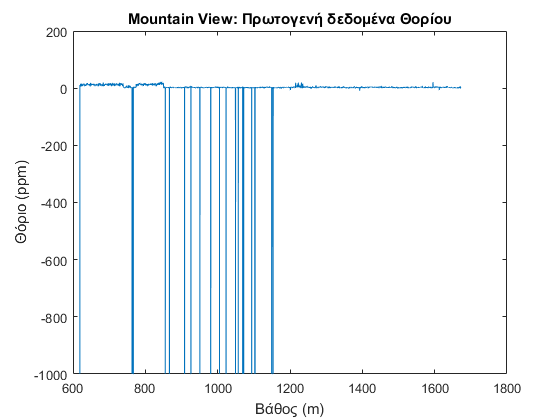

In [5]:
plot(depth_raw, thorium_raw)
title("Mountain View: Πρωτογενή δεδομένα Θορίου")
xlabel("Βάθος (m)")
ylabel("Θόριο (ppm)")

Παρατηρούμε ότι τα πρωτογενή δεδομένα περιέχουν μη-αποδεκτές (αρνητικές) τιμές ppm Θορίου. Ας κρατήσουμε τις μετρήσεις μέχρι _και_ τα 700m:

In [6]:
above_700 = (depth_raw <= 700);
depth = depth_raw(above_700);
thorium = thorium_raw(above_700);
length(thorium)


ans =

   810




Ακολουθεί η γραφική παράσταση των _πρωτογενών δεδομένων μέχρι και τα 700m:_

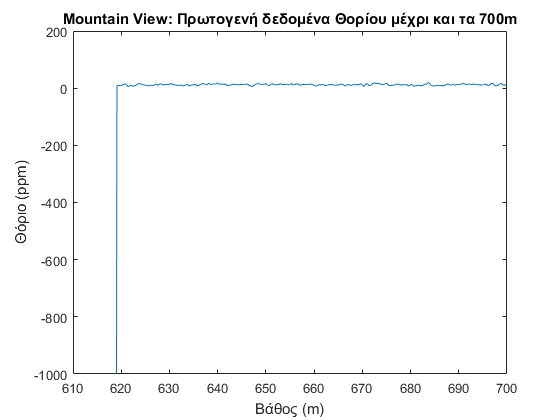

In [7]:
plot(depth, thorium)
title('Mountain View: Πρωτογενή δεδομένα Θορίου μέχρι και τα 700m')
xlabel('Βάθος (m)')
ylabel('Θόριο (ppm)')

Το διάνυσμα `accepted` περιέχει μονάδα (1) εκεί όπου το Θόριο είναι μεγαλύτερο ή ίσο του μηδενός, και μηδέν (0) αλλού. Αν υπολογίσουμε το άθροισμά του, προκύπτει ο αριθμός των έγκυρων (μη-αρνητικών) μετρήσεων. 

In [8]:
accepted = (thorium >=0);
sum(accepted)


ans =

   809




Το μήκος του διανύσματος των μετρήσεων του Θορίου μέχρι και τα 700 μέτρα μείον το άθροισμα των αποδεκτών μετρήσεων είναι...

In [9]:
length(thorium) - sum(accepted)


ans =

     1




Εναλλακτικά,

In [10]:
sum(~accepted)


ans =

     1




Άρα τελικά μονάχα μία καταγραφή (ευτυχώς!) μέχρι και τα 700m είναι μη-αποδεκτή. Είδαμε πριν ότι αυτή ήταν η πρώτη καταγραφή.

* Το πλήρες σύνολο δεδομένων περιέχει αρκετές τιμές -999.2500 (οι οποίες ενδεχομένως να σηματοδοτούν κάποιο σφάλμα) και κάποιες φαινομενικά τυχαίες αρνητικές τιμές.

Στη συνέχεια, ξαναορίζουμε τα διανύσματα του βάθους και των μετρήσεων θορίου ώστε να έχουν τις έγκυρες γραμμές μετρήσεων:

In [11]:
depth = depth(accepted);
thorium = thorium(accepted);

Ακολουθεί η γραφική παράσταση των έγκυρων μετρήσεων Θορίου μέχρι και τα 700m:

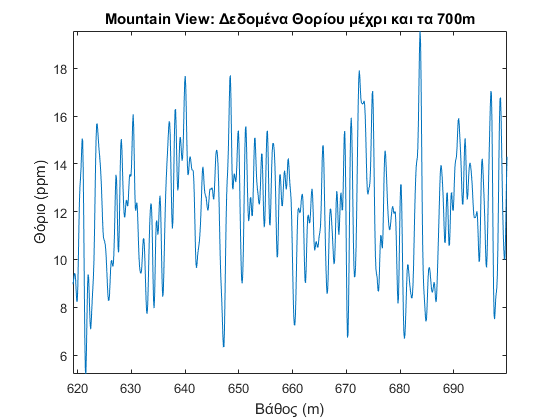

In [12]:
plot(depth, thorium)
axis('tight')
title('Mountain View: Δεδομένα Θορίου μέχρι και τα 700m')
xlabel('Βάθος (m)')
ylabel('Θόριο (ppm)')

### 2.

Μέση τιμή, τυπική απόκλιση, κύρτωση και συντελεστής ασυμμετρίας:

In [13]:
mean(thorium)
std(thorium)
kurtosis(thorium)
skewness(thorium)


ans =

   12.0563


ans =

    2.4263


ans =

    2.6993


ans =

   -0.0250




Ιστόγραμμα:

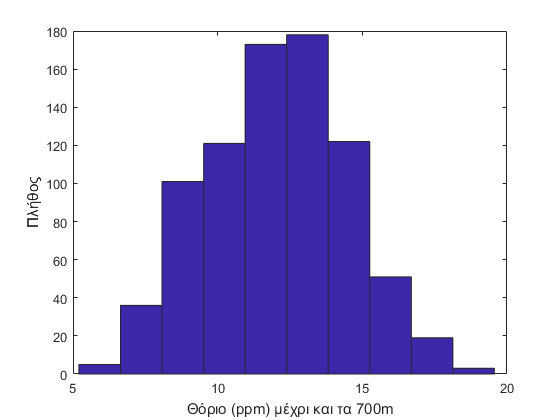

In [14]:
hist(thorium)
xlabel('Θόριο (ppm) μέχρι και τα 700m')
ylabel('Πλήθος')

### 3.

Για την εκτίμηση ενός γραμμικού μοντέλου τάσης θα χρησιμοποιήσουμε την συνάρτηση `fitlm`. Υποθέτουμε ότι το Θόριο εξαρτάται γραμμικά από το βάθος.

In [15]:
linear_trend_fit = fitlm(depth, thorium, 'VarNames', {'depth', 'thorium'})


linear_trend_fit = 


Linear regression model:
    thorium ~ 1 + depth

Estimated Coefficients:
                   Estimate        SE        tStat      pValue  
                   _________    _________    ______    _________

    (Intercept)        8.767       2.4092    3.6389    0.0002912
    depth          0.0049874    0.0036507    1.3661      0.17228


Number of observations: 809, Error degrees of freedom: 807
Root Mean Squared Error: 2.43
R-squared: 0.00231,  Adjusted R-Squared 0.00107
F-statistic vs. constant model: 1.87, p-value = 0.172



Αν $m_X(h) = \alpha_0 + \alpha_1 h$ όπου $h$ το βάθος, από τη στήλη Estimate προκύπτουν: η εκτίμηση για τη σταθερά $\alpha_0$ που είναι το σημείο τομής με τον άξονα τιμών Θορίου (intercept), καθώς και της κλίσης $\alpha_1$.

Επομένως:

* $\alpha_0 \approx 8.767$
* $\alpha_1 \approx 0.0049874$

### 4.

Με την `predict` και το μοντέλο γραμμικής τάσης που εκτιμήσαμε (`linear_trend_fit`), μπορούμε να υπολογίσουμε την τάση `thorium_trend` για κάθε τιμή του βάθους `depth`:

In [16]:
thorium_trend = predict(linear_trend_fit, depth);

Μπορούμε να σχεδιάσουμε μαζί:

* Τις τιμές Θορίου μέχρι και τα 700 m `thorium` ως προς το βάθος `depth`
* Το μοντέλο γραμμικής τάσης $m_X(h) = \alpha_0 + \alpha_1 h$ που εκτιμήσαμε, όπου το $h$ αντιστοιχεί στο βάθος `depth` ενώ η τάση $m_X(h)$ με τη `thorium_trend`

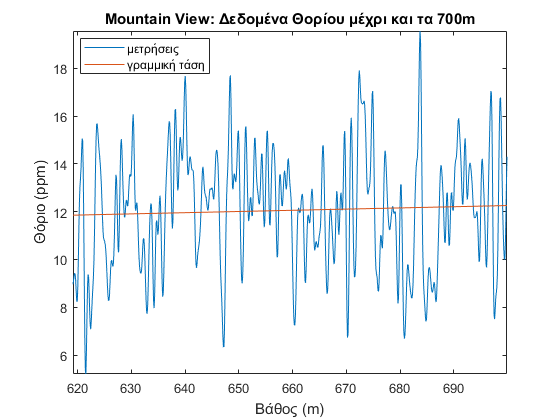

In [17]:
plot(depth, thorium)
hold('on')
plot(depth, thorium_trend)
axis('tight')
title('Mountain View: Δεδομένα Θορίου μέχρι και τα 700m')
xlabel('Βάθος (m)')
ylabel('Θόριο (ppm)')
legend('μετρήσεις', 'γραμμική τάση', 'Location', 'Best')

Η τάση έχει μια πολύ μικρή θετική κλίση.

Η διακύμανση Θορίου είναι οι μετρήσεις Θορίου μείον τη τάση που εκτιμήσαμε προηγουμένως:

In [18]:
thorium_residual = thorium - thorium_trend;

Γραφική παράσταση διακύμανσης Θορίου ως προς το βάθος:

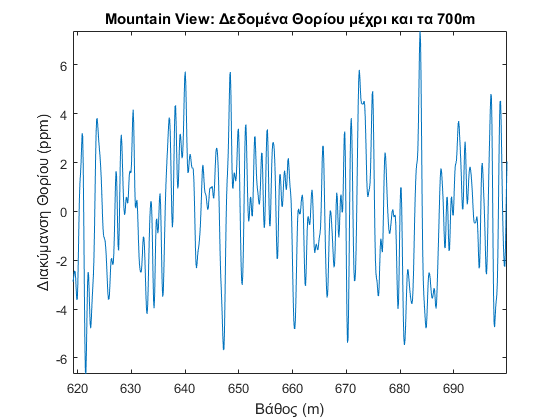

In [19]:
plot(depth, thorium_residual)
axis('tight')
title('Mountain View: Δεδομένα Θορίου μέχρι και τα 700m')
xlabel('Βάθος (m)')
ylabel('Διακύμανση Θορίου (ppm)')

Μέση τιμή, τυπική απόκλιση, κύρτωση και συντελεστής ασυμμετρίας της διακύμανσης Θορίου:

In [20]:
mean(thorium_residual)
std(thorium_residual)
kurtosis(thorium_residual)
skewness(thorium_residual)


ans =

  -4.1719e-16


ans =

    2.4235


ans =

    2.6616


ans =

   -0.0279




### 5.

Με τη `normplot` παίρνουμε το διάγραμμα κανονικής (γκαουσιανής) πιθανότητας:

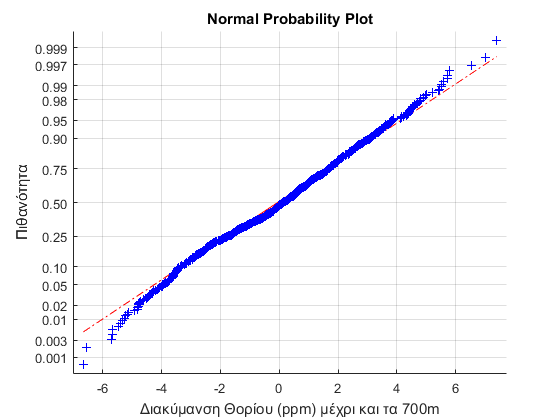

In [21]:
normplot(thorium_residual)
xlabel('Διακύμανση Θορίου (ppm) μέχρι και τα 700m')
ylabel('Πιθανότητα')

Έχουμε ενδείξεις ότι η διακύμανση του Θορίου μέχρι το βάθος των 700m ακολουθεί τη κανονική κατανομή.

-------------

## Μέρος Β'

### 6. Συνάρτηση δειγματικού βαριογράμματος

Με τη βοήθεια των `pdist` και `histc` μπορούμε να γράψουμε μια [όμορφη](https://zen-of-python.info/beautiful-is-better-than-ugly.html) συνάρτηση MATLAB&reg; για τον υπολογισμό του δειγματικού ισοτροπικού βαριογράμματος. Αποθηκεύστε στο αρχείο `sample_variogram` το περιεχόμενο του ακόλουθου μπλοκ κώδικα:

In [22]:
%%file sample_variogram.m
function [variogram, bin_centers, counts] = sample_variogram(positions, values, bin_edges)

% Pair-wise distances
d = pdist(positions);

% Pair-wise squared differences of values
squared_differences = pdist(values, 'squaredeuclidean');

% Compute bin centers from bin edges
bin_centers = bin_edges(1:end-1) + diff(bin_edges)/2;

% count is the number of pair-wise distances d within each bin range
% ind indicates the bin number that each entry in d sorts into
[counts, ind] = histc(d, bin_edges);

n_bins = length(bin_centers);
variogram = zeros(1, n_bins);

% Compute sample variogram valuue at each bin center
for i = 1:n_bins
    variogram(i) = 0.5 * mean(squared_differences(ind==i));
end

Created file 'C:\Users\Manolis\Desktop\Applied Geostats\Under development\2018-Project-Solutions\sample_variogram.m'.


Τα άκρα των διαστημάτων στα οποία θέλουμε να κατατάξουμε τις τετραγωνικές διαφορές τις διακύμανσης Θορίου είναι 50 + 1, από το μηδέν έως και το 5 (μέτρα). Έτσι θα έχουμε 50 τιμές του δειγματικού βαριογράμματος στα κέντρα αυτών των διαστημάτων. Με τη χρήση της `linspace` παίρνουμε 50 + 1 άκρα διαστημάτων από μηδέν έως και 5 μέτρα, τα οποία αντιστοιχούν σε 50 ισομήκη διαστήματα:

In [23]:
bin_edges = linspace(0, 5, 50+1);

Καλούμε τη συνάρτηση `sample_variogram` που υπολογίζει το δειγματικό βαριόγραμμα με ορίσματα το βάθος `depth`, τις τιμές της διακύμανσης του Θορίου `thorium_residual`, και τα άκρα των διαστημάτων `bin_edges` που θα καταταγούν οι αποστάσεις των σημείων μέτρησης:

In [24]:
[variogram, bin_centers, counts] = sample_variogram(depth, thorium_residual, bin_edges);

Ακολουθεί η γραφική παράσταση του δειγματικού βαριογράμματος της διακύμανσης Θορίου:

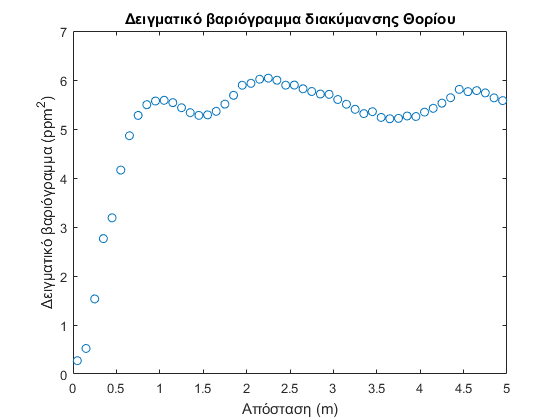

In [25]:
plot(bin_centers, variogram, 'o')
xlabel('Απόσταση (m)')
ylabel('Δειγματικό βαριόγραμμα (ppm^2)')
title('Δειγματικό βαριόγραμμα διακύμανσης Θορίου')

Προσέξτε ότι έχω επιλέξει τα 5 m ως μέγιστη απόσταση εκτίμησης βαριογράμματος. Αρκετοί στις εργασίες σας επιλέξατε μεγαλύτερη μέγιστη (!) απόσταση με αποτέλεσμα να χάσετε τη συμπεριφορά του δειγματικού βαριογράμματος στην αρχή και να οδηγηθείτε στο συμπέρασμα ότι υπάρχει φαινόμενο κόκκου.

Η διασπορά της διακύμανσης είναι:

In [26]:
var(thorium_residual)


ans =

    5.8734




Πόση είναι η οροφή (sill) του δειγματικού βαριογράμματος; Ποια η σχέση της οροφής με τη διασπορά της διακύμανσης;

### 7.

Εξετάζοντας τη συμπεριφορά του δειγματικού βαριογράμματος κοντά στο μηδέν, μπορούμε να υποθέσουμε ότι _δεν_ υφίσταται φαινόμενο κόκκου.

* Εκθετική συνάρτηση βαριογράμματος: $\gamma_e(r) = \sigma^2 (1 - \exp(-r/\xi))$
* Γκαουσιανή συνάρτηση βαριογράμματος: $\gamma_g(r) = \sigma^2 (1 - \exp(-r^2/\xi^2))$

Ακολουθούν οι ορισμοί των συναρτήσεων βαριογράμματος ως anonymous functions, τις οποίες θα χρησιμοποιήσουμε ως υποψήφια μοντέλα βαριογράμματος (εκθετική και τη γκαουσιανή συνάρτηση βαριογράμματος). Και οι δύο έχουν δύο παραμέτρους οι οποίες περιέχονται στο διάνυσμα `parameter`. Η ανεξάρτητη μεταβλητή είναι η απόσταση `r`.

In [27]:
exponential = @(parameter, r) parameter(1)^2 * (1 - exp(-r/parameter(2)));
gaussian = @(parameter, r) parameter(1)^2 * (1 - exp(-r.^2/(2*parameter(2)^2)));

Είναι απαραίτητο να δώσουμε μια καλή πρώτη εκτίμηση ως αρχικές τιμές των παραμέτρων των μοντέλων. Σε αυτό βοηθάει η προσεκτική εξέταση του δειγματικού βαριογράμματος ώστε να μπορούμε να δώσουμε απαντήσεις στα εξής ερωτήματα:

* Πόσο περίπου μπορεί να είναι η διασπορά ($\sigma^2$);

* Πόσο περίπου μπορεί να είναι το χαρακτηριστικό μήκος ($\xi$);

Και για τα δυο μοντέλα, το τετράγωνο της πρώτης παραμέτρου είναι η διασπορά ενώ η δεύτερη παράμετρος είναι το χαρακτηριστικό μήκος.

Η δική μου μαντεψιά είναι η ακόλουθη:

In [28]:
initial_parameters = [2.5, 0.5];

(αρχική τιμή $\sigma = 2.5$ και αρχική τιμή $\xi = 0.5$)

Μια καλύτερη μαντεψιά για το $\sigma$ είναι η:

In [29]:
std(thorium_residual)


ans =

    2.4235




(Γιατί;)

Για την εύρεση των βέλτιστων παραμέτρων των μοντέλων βαριογράμματος χρησιμοποιούμε τη `fitnlm`, στην οποία δίνουμε τις αποστάσεις και τις αντίστοιχες τιμές του δειγματικού βαριογράμματος, τη συνάρτηση του μοντέλου και τις αρχικές τιμές των παραμέτρων:

In [30]:
exponential_model = fitnlm(bin_centers, variogram, exponential, initial_parameters)


exponential_model = 


Nonlinear regression model:
    y ~ parameter1^2*(1 - exp( - r/parameter2))

Estimated Coefficients:
                  Estimate       SE       tStat       pValue  
                  ________    ________    ______    __________

    parameter1     2.3798     0.013465    176.75    3.3135e-69
    parameter2    0.43877     0.031235    14.047     1.259e-18


Number of observations: 50, Error degrees of freedom: 48
Root Mean Squared Error: 0.371
R-Squared: 0.916,  Adjusted R-Squared 0.915
F-statistic vs. zero model: 5.05e+03, p-value = 1.55e-56



In [31]:
gaussian_model = fitnlm(bin_centers, variogram, gaussian, initial_parameters)


gaussian_model = 


Nonlinear regression model:
    y ~ parameter1^2*(1 - exp( - r^2/(2*parameter2^2)))

Estimated Coefficients:
                  Estimate       SE        tStat       pValue  
                  ________    _________    ______    __________

    parameter1     2.3635     0.0077465     305.1    1.4132e-80
    parameter2    0.32329     0.0096723    33.424    6.6712e-35


Number of observations: 50, Error degrees of freedom: 48
Root Mean Squared Error: 0.236
R-Squared: 0.966,  Adjusted R-Squared 0.965
F-statistic vs. zero model: 1.25e+04, p-value = 5.68e-66



Κοντά έπεσε η μαντεψιά μου. Συγκρίνοντας τις τιμές R-squared, υποψιαζόμαστε ότι το γκαουσιανό μοντέλο βαριογράμματος είναι το ιδανικότερο μεταξύ των δυο.

------------
### Caveat emptor:  Η `fitlm` και η `fitnlm` _δεν δέχονται_ περιορισμούς.

Αντίθετα, η `lsqcurvefit` _δέχεται_ περιορισμούς. Ως `lb` ορίζω το κάτω φράγμα τιμών των παραμέτρων, $parameters \ge lb$. Επειδή τυπικά δεν μπορούν οι παράμετροι να είναι _ακριβώς_ μηδέν, διαλέγω μια μικρή θετική τιμή ως κάτω φράγμα και για τις δυο:

In [32]:
lb = [0.01, 0.01];

Προσέξτε τη διαφορετική σειρά των ορισμάτων στη `lsqcurvefit`:

In [33]:
exponential_fit_params = lsqcurvefit(exponential, initial_parameters, bin_centers, variogram, lb)


Local minimum possible.

lsqcurvefit stopped because the final change in the sum of squares relative to 
its initial value is less than the default value of the function tolerance.




exponential_fit_params =

    2.3798    0.4388




In [34]:
gaussian_fit_params = lsqcurvefit(gaussian, initial_parameters, bin_centers, variogram, lb)


Local minimum possible.

lsqcurvefit stopped because the final change in the sum of squares relative to 
its initial value is less than the default value of the function tolerance.




gaussian_fit_params =

    2.3635    0.3233




Με τις αρχικές τιμές που χρησιμοποιήσαμε, και οι δυο λύτες (`nlmfit` και `lsqcurvefit`) δίνουν τα ίδια αποτελέσματα. Θα χρησιμοποιήσουμε τα αποτελέσματα της `nlmfit`.

-----------------

Υπολογισμός συναρτήσεων βαριογράμματος χρησιμοποιώντας τις βέλτιστες παραμέτρους που εκτιμήθηκαν με την `nlmfit`: Η `predict` υπολογίζει τις τιμές του μοντέλου (εδώ `exponential_model` και `gaussian_model`) για κάθε τιμή της ανεξάρτητης μεταβλητής (εδώ `r`):

In [35]:
r = linspace(0, max(bin_centers))';
exponential_fit = predict(exponential_model, r);
gaussian_fit = predict(gaussian_model, r);

Γραφική παράσταση του δειγματικού βαριογράμματος και των δύο μοντέλων βαριογράμματος:

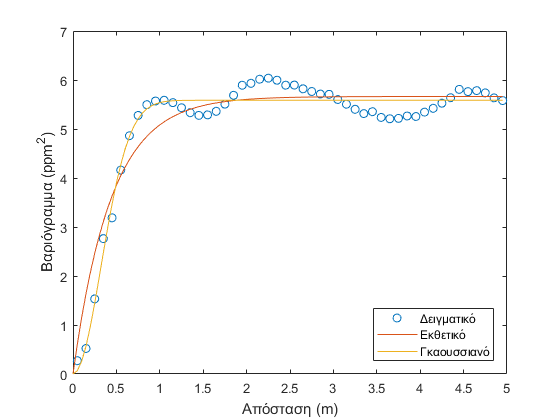

In [36]:
plot(bin_centers, variogram, 'o')
hold('on')
plot(r, exponential_fit)
plot(r, gaussian_fit)
xlabel('Απόσταση (m)')
ylabel('Βαριόγραμμα (ppm^2)')
legend('Δειγματικό', 'Εκθετικό', 'Γκαουσσιανό', 'Location', 'SouthEast')

* Το Γκαουσιανό περιγράφει καλύτερα τις συσχετίσεις σε ένα μεγαλύτερο εύρος αποστάσεων κοντά στο μηδέν.

### 8. Κανονικό Kriging

Αποθηκεύστε στο αρχείο `ordinary_kriging` τα περιεχόμενα του ακόλουθου μπλοκ κώδικα:

In [37]:
%%file ordinary_kriging.m
function [estimates, variance, weights] = ordinary_kriging(locations, values,...
                                                        estimates_locations, covariance, parameters)

% Build covariance matrices
% I am adding a small amount of noise at the diagonal 
% to help the inversion of badly-conditioned Gaussian matrices.
% This is the so-called "nugget regularization"
C = covariance(parameters, squareform(pdist(locations))) + 0.0001 * diag(rand(length(values), 1));
Ce = covariance(parameters, pdist2(locations, estimates_locations));
[n, m] = size(Ce);

% Augment matrices to account for Laplace multiplier
% Add a row of ones at the bottom, and a column of ones and a zero at right
C = [[C, ones(n, 1)]; [ones(1, n), 0]];
Ce = [Ce; ones(1, m)];

% Solve, estimate and compute variance
weights = C\Ce;
estimates = weights(1:end-1, :)' * values;
variance = C(1, 1) - diag(weights' * Ce);

Created file 'C:\Users\Manolis\Desktop\Applied Geostats\Under development\2018-Project-Solutions\ordinary_kriging.m'.


Παρατηρείστε ότι προσθέτουμε ένα μικρό τυχαίο nugget στη διαγώνιο του πίνακα συνδιασποράς με την `0.0001 * diag(rand(length(values), 1))`. Αυτό το κάνουμε για να μπορούμε να αντιστρέψουμε πίνακες συνδιασποράς οι οποίοι έχουν άσχημο [αριθμό κατάστασης](https://en.wikipedia.org/wiki/Condition_number) (συνήθως πίνακες γκαουσιανής συνδιασποράς). [Λίγη βιβλιογραφια περί του θέματος.](https://arxiv.org/abs/1602.00853)

----------------
### Προαιρετικό: Απλό Kriging

Κάποιος θα μπορούσε να ξεκινήσει από την υλοποίηση του απλού kriging αν δεν είναι σίγουρος για το πως να φτιάξει τους επαυξημένους πίνακες συνδιασποράς του κανονικού kriging. Αν θέλετε να έχετε και μια συνάρτηση που πραγματοποιεί απλό kriging, αποθηκεύστε στο αρχείο `simple_kriging` τα περιεχόμενα του ακόλουθου μπλοκ κώδικα:

In [38]:
%%file simple_kriging.m
function [estimates, variance, weights] = simple_kriging(locations, values,...
                                                        estimates_locations, covariance, parameters)

% Build covariance matrices
% I am adding a small amount of noise at the diagonal
% to help the inversion of badly-conditioned Gaussian matrices
C = covariance(parameters, squareform(pdist(locations))) + 0.0001 * diag(rand(length(values),1));
Ce = covariance(parameters, pdist2(locations, estimates_locations));

% Solve, estimate and compute variance
weights = C\Ce;
estimates = weights' * values;
variance =  C(1, 1) - diag(weights' * Ce);

Created file 'C:\Users\Manolis\Desktop\Applied Geostats\Under development\2018-Project-Solutions\simple_kriging.m'.


-------------------

#### Προετοιμασία υποσυνόλων μετρήσεων (train) και ελέγχου (test).

Από τις τελευταίες 100 μετρήσεις, οι 80 αποτελούν το υποσύνολο μετρήσεων (τις "γνωστές" μετρήσεις) ενώ οι 20 το υποσύνολο ελέγχου (οι "άγνωστες" μετρήσεις). Αυτό το κάνουμε για να δούμε πως συμπεριφέρεται το κανονικό kriging όταν του δοθεί το υποσύνολο μετρήσεων για να εκτιμήσει τις τιμές στο υποσύνολο ελέγχου.

In [39]:
n_test = 20;
n_train = 100 - n_test;

depth_train = depth(end-(n_train + n_test)+1:end-n_test);
thorium_residual_train = thorium_residual(end-(n_train+n_test)+1:end-n_test);
size(depth_train)

depth_test = depth(end-n_test+1:end);
thorium_residual_test = thorium_residual(end-n_test+1:end);
size(thorium_residual_test)


ans =

    80     1


ans =

    20     1




#### Συνάρτηση συνδιασποράς

Η παραπάνω συνάρτηση κανονικού kriging χρησιμοποιεί πίνακες συνδιασποράς. Άρα από το μοντέλο βαριογράμματος πρέπει να πάμε στην αντίστοιχη συνάρτηση συνδιασποράς. Είδαμε ότι το γκαουσιανό μοντέλο βαριογράμματος περιγράφει καλύτερα τη συμπεριφορά του δειγματικού βαριογράμματος στην αρχή των αξόνων (δηλ. για μικρές αποστάσεις). Επίσης, υποθέτουμε ότι η διακύμανση του Θορίου είναι στάσιμη άρα ξέρουμε πως να πάμε από τη συνάρτηση βαριογράμματος στη συνάρτηση συνδιασποράς:

In [40]:
covariance = @(parameter, r) parameter(1)^2 - gaussian(parameter, r)
covariance_parameters = gaussian_model.Coefficients.Estimate


covariance =

  function_handle with value:

    @(parameter,r)parameter(1)^2-gaussian(parameter,r)


covariance_parameters =

    2.3635
    0.3233




Τώρα έχουμε ο,τι χρειάζεται για να καλέσουμε την `ordinary_kriging`.

Δίνουμε:

* Τις συντεταγμένες του υποσυνόλου μετρήσεων `depth_train`
* Τις τιμές της διακύμανσης Θορίου στο υποσύνολο μετρήσεων `thorium_residual_train`
* Τις συντεταγμένες στις οποίες θέλουμε εκτίμηση της διακύμανσης του Θορίου `depth_test`
* Τη συνάρτηση συνδιασποράς (το όνομα της) `covariance`
* Και τις τιμές των παραμέτρων της συνάρτησης συνδιασποράς `covariance_parameters`

Παίρνουμε:

* Τις εκτιμήσεις των τιμών της διακύμανσης Θορίου `estimates` στις συντεταγμένες `depth_test`
* Την διασπορά των εκτιμήσεων `variance`
* Και τα βάρη `weights` (δεν θα τα χρησιμοποιήσουμε)

In [41]:
[estimates, variance, weights] = ordinary_kriging(depth_train, thorium_residual_train,...
                                                    depth_test, covariance, covariance_parameters);

Υπολογισμός ζώνης αβεβαιότητας 95%: Εκτίμηση $\pm$ δύο τυπικές αποκλίσεις. 

In [42]:
upper_bound = estimates + 2*sqrt(variance);
lower_bound = estimates - 2*sqrt(variance);

Σχεδιασμός των τελευταίων 100 τιμών διακύμανσης Θορίου, της εκτίμησης και της ζώνης αβεβαιότητας:

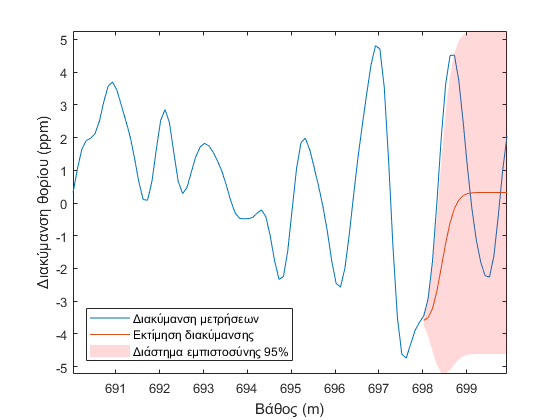

In [43]:
alpha_ = 0.15;
plot(depth(end-(n_train+n_test)+1:end), thorium_residual(end-(n_train+n_test)+1:end))
hold('on')
plot(depth_test, estimates)
h = fill([depth_test', fliplr(depth_test')], [lower_bound', fliplr(upper_bound')], 'r');
set(h,'EdgeColor','none');
alpha(alpha_)
axis('tight')
xlabel('Βάθος (m)')
ylabel('Διακύμανση θορίου (ppm)')
[~, LegendIcons] = legend('Διακύμανση μετρήσεων', 'Εκτίμηση διακύμανσης',...
                          'Διάστημα εμπιστοσύνης 95%', 'Location', 'SouthWest');
PatchInLegend = findobj(LegendIcons, 'type', 'patch');
set(PatchInLegend, 'facea', alpha_);

### 9.

Ώρα να προσθέσουμε πίσω την τάση στις εκτιμήσεις,

In [44]:
estimates_trend = estimates + predict(linear_trend_fit, depth_test);

και στα όρια του διαστήματος εμπιστοσύνης: 

In [45]:
upper_bound_trend = estimates_trend + 2*sqrt(variance);
lower_bound_trend = estimates_trend - 2*sqrt(variance);

### 10.

Et voilà!

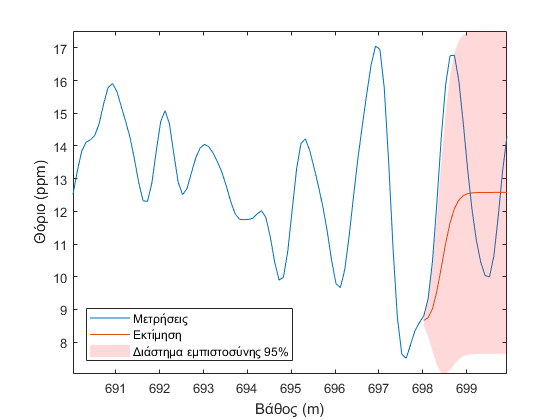

In [46]:
alpha_ = 0.15;
plot(depth(end-(n_train+n_test)+1:end), thorium(end-(n_train+n_test)+1:end))
hold('on')
plot(depth_test, estimates_trend)
h = fill([depth_test', fliplr(depth_test')], [lower_bound_trend', fliplr(upper_bound_trend')], 'r');
set(h,'EdgeColor','none');
alpha(alpha_)
axis('tight')
xlabel('Βάθος (m)')
ylabel('Θόριο (ppm)')
[~, LegendIcons] = legend('Μετρήσεις', 'Εκτίμηση', 'Διάστημα εμπιστοσύνης 95%',...
                          'Location', 'SouthWest');
PatchInLegend = findobj(LegendIcons, 'type', 'patch');
set(PatchInLegend, 'facea', alpha_);

------------------
_Καλή επιτυχία!_